In [2]:
import midynet
import matplotlib.pyplot as plt
import numpy as np

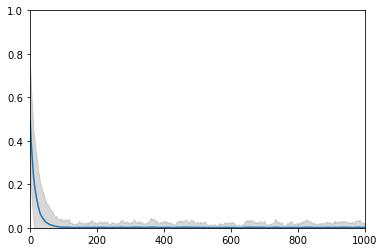

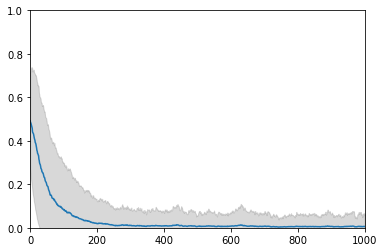

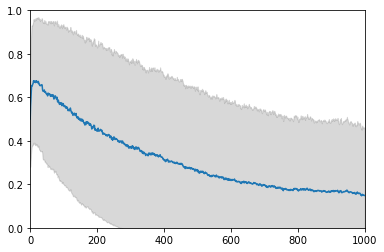

In [220]:
config = midynet.config.ExperimentConfig.default("test", "sis", "ser")
config.dynamics.set_value("infection_prob", [0.05, 0.2, 0.5])
config.dynamics.set_value("normalize", True)
config.dynamics.set_value("recovery_prob", 0.1)
config.dynamics.set_value("auto_infection_prob", 1e-4)
config.graph.set_value("size", 5)
config.graph.edge_count.set_value("state", 5)

T = 1000
num_samples = 1000
config.dynamics.set_value("num_steps", T)
I = np.zeros((num_samples, T))
for c in config.sequence():
    graph = midynet.config.RandomGraphFactory.build(c.graph)
    dynamics = midynet.config.DynamicsFactory.build(c.dynamics)
    dynamics.set_random_graph(graph.get_wrap())

    for i in range(num_samples):
        dynamics.sample()
        I[i] = 1 - np.array(dynamics.get_past_states()).mean(-1)
    avgI = np.mean(I, axis=0)
    lowI = avgI - np.std(I, axis=0)
    highI = avgI + np.std(I, axis=0)
    plt.fill_between(range(T), lowI, highI, color="grey", alpha=0.3)
    plt.plot(I.mean(0))
    plt.xlim([0, T])
    plt.ylim([0, 1])
    plt.show()

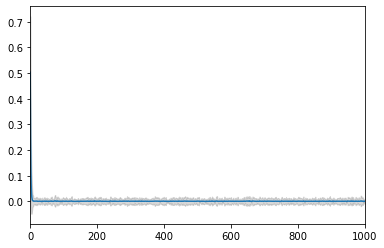

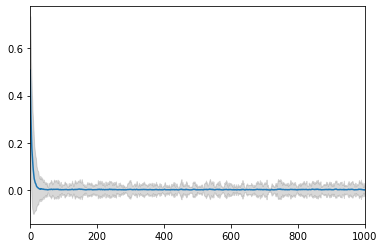

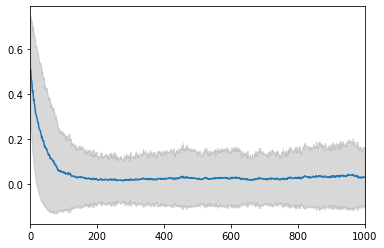

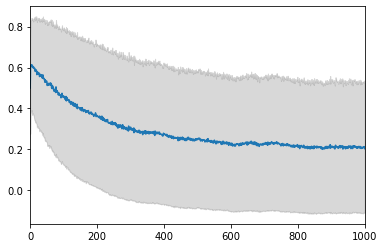

In [222]:
config = midynet.config.ExperimentConfig.default("test", "cowan", "ser")
config.dynamics.set_value("alpha", 7.0)
config.dynamics.set_value("nu", [1., 2., 4.])
config.dynamics.set_value("normalize", True)
config.dynamics.set_value("eta", 0.5)
config.dynamics.set_value("auto_infection_prob", 1e-4)
config.graph.set_value("size", 5)
config.graph.edge_count.set_value("state", 5)

T = 1000
num_samples = 1000
config.dynamics.set_value("num_steps", T)
I = np.zeros((num_samples, T))
for c in config.sequence():
    graph = midynet.config.RandomGraphFactory.build(c.graph)
    dynamics = midynet.config.DynamicsFactory.build(c.dynamics)
    dynamics.set_random_graph(graph.get_wrap())

    for i in range(num_samples):
        dynamics.sample()
        I[i] = np.array(dynamics.get_past_states()).mean(-1)
    avgI = np.mean(I, axis=0)
    lowI = avgI - np.std(I, axis=0)
    highI = avgI + np.std(I, axis=0)
    plt.fill_between(range(T), lowI, highI, color="grey", alpha=0.3)
    plt.plot(I.mean(0))
#     plt.xscale("log")
#     plt.yscale("log")
    plt.xlim([0, T])
#     plt.ylim([0, 1])
    plt.show()